# Classifying News Headlines

This notebook explains the classification of news headlines as sarcastic and non-sarcastic. We are using the same headlines data as used before.


### Dataset

- https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

In [4]:
##import the required libraries and APIs
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
print(tf.__version__)

2.5.0


## Downloading the News Headlines data

In [5]:
import json

def parse_data(file):
    for l in open(file,'r'):
        yield json.loads(l)

data = list(parse_data('Sarcasm_Headlines_Dataset_v2.json'))

In [6]:
data = pd.DataFrame(data)

In [7]:
data

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [8]:
##store headlines and labels in respective lists
headlines = list(data['headline'])
labels = list(data['is_sarcastic'])

## Set the parameters

In [9]:
##define tokenizing and padding parameters
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

## Splitting the training and testing set

In [10]:
##sentences
training_sentences = headlines[0:training_size]
testing_sentences = headlines[training_size:]

##labels
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

## Preprocess sentences


In [11]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [12]:
# convert lists into numpy arrays to make it work with TensorFlow 2.x
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

## Define the neural network model with the following layers:
1. Embedding layer
2. Global Average pooling layer(1D)
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(240, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

##compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 240)               4080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 241       
Total params: 164,321
Trainable params: 164,321
Non-trainable params: 0
_________________________________________________________________


## Train the model

Save it into history

In [24]:
num_epochs = 10
history = model.fit(training_padded, 
                    training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Epoch 1/10
625/625 - 2s - loss: 0.6093 - accuracy: 0.6484 - val_loss: 0.4086 - val_accuracy: 0.8233
Epoch 2/10
625/625 - 1s - loss: 0.3484 - accuracy: 0.8507 - val_loss: 0.3433 - val_accuracy: 0.8544
Epoch 3/10
625/625 - 1s - loss: 0.2697 - accuracy: 0.8895 - val_loss: 0.3642 - val_accuracy: 0.8368
Epoch 4/10
625/625 - 1s - loss: 0.2209 - accuracy: 0.9135 - val_loss: 0.3525 - val_accuracy: 0.8496
Epoch 5/10
625/625 - 1s - loss: 0.1863 - accuracy: 0.9287 - val_loss: 0.3716 - val_accuracy: 0.8430
Epoch 6/10
625/625 - 1s - loss: 0.1662 - accuracy: 0.9356 - val_loss: 0.3930 - val_accuracy: 0.8406
Epoch 7/10
625/625 - 1s - loss: 0.1427 - accuracy: 0.9475 - val_loss: 0.4096 - val_accuracy: 0.8435
Epoch 8/10
625/625 - 1s - loss: 0.1267 - accuracy: 0.9545 - val_loss: 0.4509 - val_accuracy: 0.8358
Epoch 9/10
625/625 - 1s - loss: 0.1141 - accuracy: 0.9583 - val_loss: 0.4770 - val_accuracy: 0.8354
Epoch 10/10
625/625 - 1s - loss: 0.1025 - accuracy: 0.9633 - val_loss: 0.5190 - val_accuracy: 0.8342

## Visualise the train & validation accuracy and loss

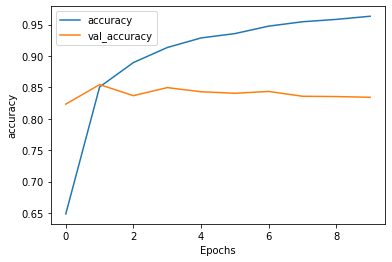

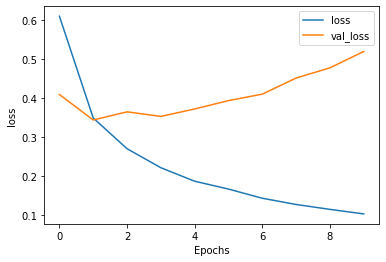

In [25]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

## Classifying a new sentence

In [26]:
sentence = ["game of thrones season finale showing this sunday night"]
sentence2 = ["she deserves him, she gave herself trouble enough to get him"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence2)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model.predict(padded_seqs))

[[0.7971051]]
